In [64]:
import numpy as np
diction=np.load('/home/uga_qinglin/Documents/ADHD_DL/ADHD200_DL_diction.npy')
diction2=np.load('/home/uga_qinglin/Documents/ADHD_DL/ADHD200_VAE_diction.npy')

In [54]:
Y=np.load('/home/share/TmpData/Qinglin/ADHD200_Athena_preproc_flirtfix/NYU/All_Labels.npy')

In [65]:
diction2.shape

(40, 37152)

In [56]:
def Diction2Conn(diction):
    #input diction 
    #output:  
    d=[None]*216 #216 subj, t=172
    for i in range(0,216):    
        temp=diction[:,i*172:(i+1)*172]
        d[i]=temp.T
        #d3[i,:] = temp.flatten()
    from nilearn.connectome import ConnectivityMeasure
    connectivity_biomarkers = {}

    conn_measure = ConnectivityMeasure(kind='correlation', vectorize=True)
    connectivity_biomarkers = conn_measure.fit_transform(d)
    return connectivity_biomarkers

In [62]:
def Diction(diction):
    #input diction 
    d=np.zeros((216,6880))
    for i in range(0,216):    
        temp=diction[:,i*172:(i+1)*172]
        d[i,:] = temp.flatten()
    return d


In [58]:
def classify(X):
    #input: n_samples * n_features
    from sklearn.model_selection import StratifiedKFold

    cv = StratifiedKFold(n_splits=3)
    from sklearn.neural_network import MLPClassifier
    from sklearn.neighbors import KNeighborsClassifier
    from sklearn.svm import SVC
    from sklearn.gaussian_process import GaussianProcessClassifier
    from sklearn.gaussian_process.kernels import RBF
    from sklearn.tree import DecisionTreeClassifier
    from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
    from sklearn.naive_bayes import GaussianNB
    from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

    names = ["Nearest Neighbors", "Linear SVM", "RBF SVM", "Gaussian Process",
             "Decision Tree", "Random Forest", "Neural Net", "AdaBoost",
             "Naive Bayes", "QDA"]

    classifiers = [
        KNeighborsClassifier(3),
        SVC(kernel="linear", C=0.025),
        SVC(gamma=2, C=1),
        GaussianProcessClassifier(1.0 * RBF(1.0)),
        DecisionTreeClassifier(max_depth=5),
        RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
        MLPClassifier(alpha=1),
        AdaBoostClassifier(),
        GaussianNB(),
        QuadraticDiscriminantAnalysis()]

    from sklearn.model_selection import cross_val_score
    mean_scores = []

    for name, clf in zip(names, classifiers):
        cv_scores = cross_val_score(clf,
                                    X,
                                    y=Y,
                                    cv=cv,
                                    groups=Y,
                                    scoring='accuracy',
                                    )
        mean_scores.append(cv_scores.mean())

    %matplotlib inline
    from nilearn.plotting import show
    import numpy as np
    import matplotlib.pylab as plt
    plt.figure(figsize=(6, 4))
    positions = np.arange(len(names)) * .1 + .1
    plt.barh(positions, mean_scores, align='center', height=.05)
    yticks = [name.replace(' ', '\n') for name in names]
    plt.yticks(positions, yticks)
    plt.xlabel('Classification accuracy')
    plt.grid(True)
    plt.tight_layout()

    show()

/usr/local/lib/python3.5/dist-packages/sklearn/discriminant_analysis.py:686: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.5/dist-packages/sklearn/discriminant_analysis.py:686: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.5/dist-packages/sklearn/discriminant_analysis.py:686: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


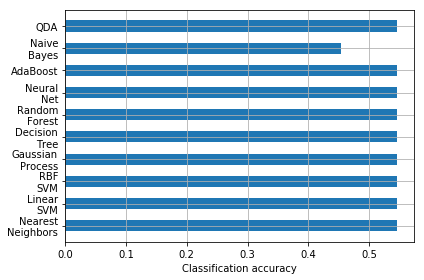

In [59]:
classify(Diction2Conn(diction))

/usr/local/lib/python3.5/dist-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.5/dist-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.5/dist-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.5/dist-packages/sklearn/discriminant_analysis.py:686: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.5/dist-packages/sklearn/discriminant_analysis.py:686: UserWarning: Variab

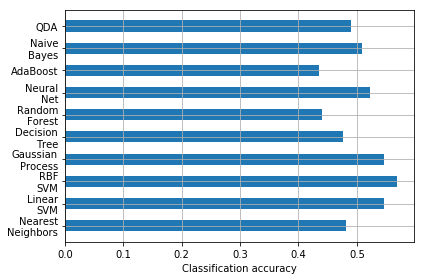

In [63]:
classify(Diction(diction))

/usr/local/lib/python3.5/dist-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.5/dist-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.5/dist-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.5/dist-packages/sklearn/discriminant_analysis.py:686: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.5/dist-packages/sklearn/discriminant_analysis.py:686: UserWarning: Variab

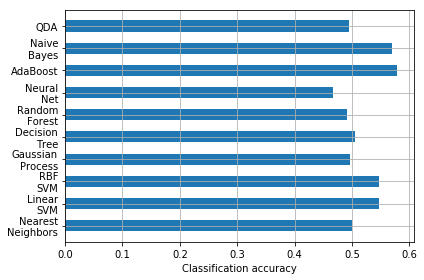

In [66]:
classify(Diction2Conn(diction2))

/usr/local/lib/python3.5/dist-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.5/dist-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.5/dist-packages/sklearn/discriminant_analysis.py:686: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.5/dist-packages/sklearn/discriminant_analysis.py:686: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.5/dist-packages/sklearn/discriminant_analysis.py:686: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


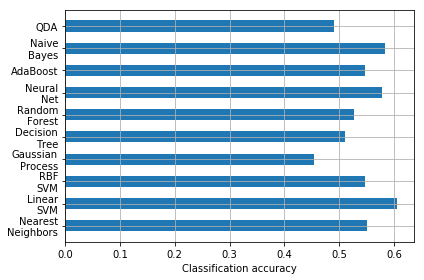

In [67]:
classify(Diction(diction2))

In [68]:
d=Diction2Conn(diction)
print(d.shape)

(216, 820)


Fitting estimator with 6880 features.
Fitting estimator with 6780 features.
Fitting estimator with 6680 features.
Fitting estimator with 6580 features.
Fitting estimator with 6480 features.
Fitting estimator with 6380 features.
Fitting estimator with 6280 features.
Fitting estimator with 6180 features.
Fitting estimator with 6080 features.
Fitting estimator with 5980 features.
Fitting estimator with 5880 features.
Fitting estimator with 5780 features.
Fitting estimator with 5680 features.
Fitting estimator with 5580 features.
Fitting estimator with 5480 features.
Fitting estimator with 5380 features.
Fitting estimator with 5280 features.
Fitting estimator with 5180 features.
Fitting estimator with 5080 features.
Fitting estimator with 4980 features.
Fitting estimator with 4880 features.
Fitting estimator with 4780 features.
Fitting estimator with 4680 features.
Fitting estimator with 4580 features.
Fitting estimator with 4480 features.
Fitting estimator with 4380 features.
Fitting esti

Fitting estimator with 5880 features.
Fitting estimator with 5780 features.
Fitting estimator with 5680 features.
Fitting estimator with 5580 features.
Fitting estimator with 5480 features.
Fitting estimator with 5380 features.
Fitting estimator with 5280 features.
Fitting estimator with 5180 features.
Fitting estimator with 5080 features.
Fitting estimator with 4980 features.
Fitting estimator with 4880 features.
Fitting estimator with 4780 features.
Fitting estimator with 4680 features.
Fitting estimator with 4580 features.
Fitting estimator with 4480 features.
Fitting estimator with 4380 features.
Fitting estimator with 4280 features.
Optimal number of features : 4180


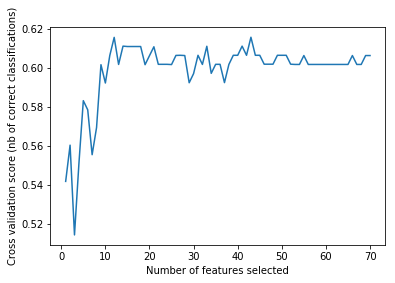

In [72]:
# https://scikit-learn.org/stable/auto_examples/feature_selection/plot_rfe_with_cross_validation.html#sphx-glr-auto-examples-feature-selection-plot-rfe-with-cross-validation-py
# Feature Selection
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.datasets import make_classification


# Create the RFE object and compute a cross-validated score.
svc = SVC(kernel="linear")
# The "accuracy" scoring is proportional to the number of correct
# classifications
rfecv = RFECV(estimator=svc, step=100, cv=StratifiedKFold(3),
              scoring='accuracy',verbose=1)
rfecv.fit(Diction(diction2), Y)

print("Optimal number of features : %d" % rfecv.n_features_)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

Fitting estimator with 820 features.
Fitting estimator with 819 features.
Fitting estimator with 818 features.
Fitting estimator with 817 features.
Fitting estimator with 816 features.
Fitting estimator with 815 features.
Fitting estimator with 814 features.
Fitting estimator with 813 features.
Fitting estimator with 812 features.
Fitting estimator with 811 features.
Fitting estimator with 810 features.
Fitting estimator with 809 features.
Fitting estimator with 808 features.
Fitting estimator with 807 features.
Fitting estimator with 806 features.
Fitting estimator with 805 features.
Fitting estimator with 804 features.
Fitting estimator with 803 features.
Fitting estimator with 802 features.
Fitting estimator with 801 features.
Fitting estimator with 800 features.
Fitting estimator with 799 features.
Fitting estimator with 798 features.
Fitting estimator with 797 features.
Fitting estimator with 796 features.
Fitting estimator with 795 features.
Fitting estimator with 794 features.
F

Fitting estimator with 591 features.
Fitting estimator with 590 features.
Fitting estimator with 589 features.
Fitting estimator with 588 features.
Fitting estimator with 587 features.
Fitting estimator with 586 features.
Fitting estimator with 585 features.
Fitting estimator with 584 features.
Fitting estimator with 583 features.
Fitting estimator with 582 features.
Fitting estimator with 581 features.
Fitting estimator with 580 features.
Fitting estimator with 579 features.
Fitting estimator with 578 features.
Fitting estimator with 577 features.
Fitting estimator with 576 features.
Fitting estimator with 575 features.
Fitting estimator with 574 features.
Fitting estimator with 573 features.
Fitting estimator with 572 features.
Fitting estimator with 571 features.
Fitting estimator with 570 features.
Fitting estimator with 569 features.
Fitting estimator with 568 features.
Fitting estimator with 567 features.
Fitting estimator with 566 features.
Fitting estimator with 565 features.
F

Fitting estimator with 366 features.
Fitting estimator with 365 features.
Fitting estimator with 364 features.
Fitting estimator with 363 features.
Fitting estimator with 362 features.
Fitting estimator with 361 features.
Fitting estimator with 360 features.
Fitting estimator with 359 features.
Fitting estimator with 358 features.
Fitting estimator with 357 features.
Fitting estimator with 356 features.
Fitting estimator with 355 features.
Fitting estimator with 354 features.
Fitting estimator with 353 features.
Fitting estimator with 352 features.
Fitting estimator with 351 features.
Fitting estimator with 350 features.
Fitting estimator with 349 features.
Fitting estimator with 348 features.
Fitting estimator with 347 features.
Fitting estimator with 346 features.
Fitting estimator with 345 features.
Fitting estimator with 344 features.
Fitting estimator with 343 features.
Fitting estimator with 342 features.
Fitting estimator with 341 features.
Fitting estimator with 340 features.
F

Fitting estimator with 114 features.
Fitting estimator with 113 features.
Fitting estimator with 112 features.
Fitting estimator with 111 features.
Fitting estimator with 110 features.
Fitting estimator with 109 features.
Fitting estimator with 108 features.
Fitting estimator with 107 features.
Fitting estimator with 106 features.
Fitting estimator with 105 features.
Fitting estimator with 104 features.
Fitting estimator with 103 features.
Fitting estimator with 102 features.
Fitting estimator with 101 features.
Fitting estimator with 100 features.
Fitting estimator with 99 features.
Fitting estimator with 98 features.
Fitting estimator with 97 features.
Fitting estimator with 96 features.
Fitting estimator with 95 features.
Fitting estimator with 94 features.
Fitting estimator with 93 features.
Fitting estimator with 92 features.
Fitting estimator with 91 features.
Fitting estimator with 90 features.
Fitting estimator with 89 features.
Fitting estimator with 88 features.
Fitting estim

Fitting estimator with 699 features.
Fitting estimator with 698 features.
Fitting estimator with 697 features.
Fitting estimator with 696 features.
Fitting estimator with 695 features.
Fitting estimator with 694 features.
Fitting estimator with 693 features.
Fitting estimator with 692 features.
Fitting estimator with 691 features.
Fitting estimator with 690 features.
Fitting estimator with 689 features.
Fitting estimator with 688 features.
Fitting estimator with 687 features.
Fitting estimator with 686 features.
Fitting estimator with 685 features.
Fitting estimator with 684 features.
Fitting estimator with 683 features.
Fitting estimator with 682 features.
Fitting estimator with 681 features.
Fitting estimator with 680 features.
Fitting estimator with 679 features.
Fitting estimator with 678 features.
Fitting estimator with 677 features.
Fitting estimator with 676 features.
Fitting estimator with 675 features.
Fitting estimator with 674 features.
Fitting estimator with 673 features.
F

Fitting estimator with 476 features.
Fitting estimator with 475 features.
Fitting estimator with 474 features.
Fitting estimator with 473 features.
Fitting estimator with 472 features.
Fitting estimator with 471 features.
Fitting estimator with 470 features.
Fitting estimator with 469 features.
Fitting estimator with 468 features.
Fitting estimator with 467 features.
Fitting estimator with 466 features.
Fitting estimator with 465 features.
Fitting estimator with 464 features.
Fitting estimator with 463 features.
Fitting estimator with 462 features.
Fitting estimator with 461 features.
Fitting estimator with 460 features.
Fitting estimator with 459 features.
Fitting estimator with 458 features.
Fitting estimator with 457 features.
Fitting estimator with 456 features.
Fitting estimator with 455 features.
Fitting estimator with 454 features.
Fitting estimator with 453 features.
Fitting estimator with 452 features.
Fitting estimator with 451 features.
Fitting estimator with 450 features.
F

Fitting estimator with 248 features.
Fitting estimator with 247 features.
Fitting estimator with 246 features.
Fitting estimator with 245 features.
Fitting estimator with 244 features.
Fitting estimator with 243 features.
Fitting estimator with 242 features.
Fitting estimator with 241 features.
Fitting estimator with 240 features.
Fitting estimator with 239 features.
Fitting estimator with 238 features.
Fitting estimator with 237 features.
Fitting estimator with 236 features.
Fitting estimator with 235 features.
Fitting estimator with 234 features.
Fitting estimator with 233 features.
Fitting estimator with 232 features.
Fitting estimator with 231 features.
Fitting estimator with 230 features.
Fitting estimator with 229 features.
Fitting estimator with 228 features.
Fitting estimator with 227 features.
Fitting estimator with 226 features.
Fitting estimator with 225 features.
Fitting estimator with 224 features.
Fitting estimator with 223 features.
Fitting estimator with 222 features.
F

Fitting estimator with 817 features.
Fitting estimator with 816 features.
Fitting estimator with 815 features.
Fitting estimator with 814 features.
Fitting estimator with 813 features.
Fitting estimator with 812 features.
Fitting estimator with 811 features.
Fitting estimator with 810 features.
Fitting estimator with 809 features.
Fitting estimator with 808 features.
Fitting estimator with 807 features.
Fitting estimator with 806 features.
Fitting estimator with 805 features.
Fitting estimator with 804 features.
Fitting estimator with 803 features.
Fitting estimator with 802 features.
Fitting estimator with 801 features.
Fitting estimator with 800 features.
Fitting estimator with 799 features.
Fitting estimator with 798 features.
Fitting estimator with 797 features.
Fitting estimator with 796 features.
Fitting estimator with 795 features.
Fitting estimator with 794 features.
Fitting estimator with 793 features.
Fitting estimator with 792 features.
Fitting estimator with 791 features.
F

Fitting estimator with 595 features.
Fitting estimator with 594 features.
Fitting estimator with 593 features.
Fitting estimator with 592 features.
Fitting estimator with 591 features.
Fitting estimator with 590 features.
Fitting estimator with 589 features.
Fitting estimator with 588 features.
Fitting estimator with 587 features.
Fitting estimator with 586 features.
Fitting estimator with 585 features.
Fitting estimator with 584 features.
Fitting estimator with 583 features.
Fitting estimator with 582 features.
Fitting estimator with 581 features.
Fitting estimator with 580 features.
Fitting estimator with 579 features.
Fitting estimator with 578 features.
Fitting estimator with 577 features.
Fitting estimator with 576 features.
Fitting estimator with 575 features.
Fitting estimator with 574 features.
Fitting estimator with 573 features.
Fitting estimator with 572 features.
Fitting estimator with 571 features.
Fitting estimator with 570 features.
Fitting estimator with 569 features.
F

Fitting estimator with 363 features.
Fitting estimator with 362 features.
Fitting estimator with 361 features.
Fitting estimator with 360 features.
Fitting estimator with 359 features.
Fitting estimator with 358 features.
Fitting estimator with 357 features.
Fitting estimator with 356 features.
Fitting estimator with 355 features.
Fitting estimator with 354 features.
Fitting estimator with 353 features.
Fitting estimator with 352 features.
Fitting estimator with 351 features.
Fitting estimator with 350 features.
Fitting estimator with 349 features.
Fitting estimator with 348 features.
Fitting estimator with 347 features.
Fitting estimator with 346 features.
Fitting estimator with 345 features.
Fitting estimator with 344 features.
Fitting estimator with 343 features.
Fitting estimator with 342 features.
Fitting estimator with 341 features.
Fitting estimator with 340 features.
Fitting estimator with 339 features.
Fitting estimator with 338 features.
Fitting estimator with 337 features.
F

Fitting estimator with 137 features.
Fitting estimator with 136 features.
Fitting estimator with 135 features.
Fitting estimator with 134 features.
Fitting estimator with 133 features.
Fitting estimator with 132 features.
Fitting estimator with 131 features.
Fitting estimator with 130 features.
Fitting estimator with 129 features.
Fitting estimator with 128 features.
Fitting estimator with 127 features.
Fitting estimator with 126 features.
Fitting estimator with 125 features.
Fitting estimator with 124 features.
Fitting estimator with 123 features.
Fitting estimator with 122 features.
Fitting estimator with 121 features.
Fitting estimator with 120 features.
Fitting estimator with 119 features.
Fitting estimator with 118 features.
Fitting estimator with 117 features.
Fitting estimator with 116 features.
Fitting estimator with 115 features.
Fitting estimator with 114 features.
Fitting estimator with 113 features.
Fitting estimator with 112 features.
Fitting estimator with 111 features.
F

Fitting estimator with 732 features.
Fitting estimator with 731 features.
Fitting estimator with 730 features.
Fitting estimator with 729 features.
Fitting estimator with 728 features.
Fitting estimator with 727 features.
Fitting estimator with 726 features.
Fitting estimator with 725 features.
Fitting estimator with 724 features.
Fitting estimator with 723 features.
Fitting estimator with 722 features.
Fitting estimator with 721 features.
Fitting estimator with 720 features.
Fitting estimator with 719 features.
Fitting estimator with 718 features.
Fitting estimator with 717 features.
Fitting estimator with 716 features.
Fitting estimator with 715 features.
Fitting estimator with 714 features.
Fitting estimator with 713 features.
Fitting estimator with 712 features.
Fitting estimator with 711 features.
Fitting estimator with 710 features.
Fitting estimator with 709 features.
Fitting estimator with 708 features.
Fitting estimator with 707 features.
Fitting estimator with 706 features.
F

Fitting estimator with 510 features.
Fitting estimator with 509 features.
Fitting estimator with 508 features.
Fitting estimator with 507 features.
Fitting estimator with 506 features.
Fitting estimator with 505 features.
Fitting estimator with 504 features.
Fitting estimator with 503 features.
Fitting estimator with 502 features.
Fitting estimator with 501 features.
Fitting estimator with 500 features.
Fitting estimator with 499 features.
Fitting estimator with 498 features.
Fitting estimator with 497 features.
Fitting estimator with 496 features.
Fitting estimator with 495 features.
Fitting estimator with 494 features.
Fitting estimator with 493 features.
Fitting estimator with 492 features.
Fitting estimator with 491 features.
Fitting estimator with 490 features.
Fitting estimator with 489 features.
Fitting estimator with 488 features.
Fitting estimator with 487 features.
Fitting estimator with 486 features.
Fitting estimator with 485 features.
Fitting estimator with 484 features.
F

Fitting estimator with 280 features.
Fitting estimator with 279 features.
Fitting estimator with 278 features.
Fitting estimator with 277 features.
Fitting estimator with 276 features.
Fitting estimator with 275 features.
Fitting estimator with 274 features.
Fitting estimator with 273 features.
Fitting estimator with 272 features.
Fitting estimator with 271 features.
Fitting estimator with 270 features.
Fitting estimator with 269 features.
Fitting estimator with 268 features.
Fitting estimator with 267 features.
Fitting estimator with 266 features.
Fitting estimator with 265 features.
Fitting estimator with 264 features.
Fitting estimator with 263 features.
Fitting estimator with 262 features.
Fitting estimator with 261 features.
Fitting estimator with 260 features.
Fitting estimator with 259 features.
Fitting estimator with 258 features.
Fitting estimator with 257 features.
Fitting estimator with 256 features.
Fitting estimator with 255 features.
Fitting estimator with 254 features.
F

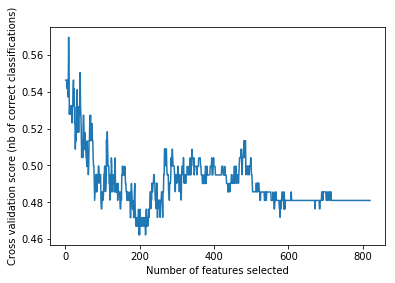

In [74]:
# https://scikit-learn.org/stable/auto_examples/feature_selection/plot_rfe_with_cross_validation.html#sphx-glr-auto-examples-feature-selection-plot-rfe-with-cross-validation-py
# Feature Selection
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.datasets import make_classification


# Create the RFE object and compute a cross-validated score.
svc = SVC(kernel="linear")
# The "accuracy" scoring is proportional to the number of correct
# classifications
rfecv = RFECV(estimator=svc, step=1, cv=StratifiedKFold(3),
              scoring='accuracy',verbose=1)
rfecv.fit(Diction2Conn(diction2), Y)

print("Optimal number of features : %d" % rfecv.n_features_)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()